<a href="https://colab.research.google.com/github/darshanvjani/AR-maze_unity-project-/blob/master/CAMs%2C%20LRs%2C%20and%20Optimizers/Session_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/ERA

/content/drive/MyDrive/ERA


In [ ]:
# !git clone https://github.com/darshanvjani/torchcraft.git

In [ ]:
!pip install albumentations
!pip install torch-lr-finder

In [ ]:
from torch_lr_finder import LRFinder
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR

In [ ]:
from torchcraft import main
from torchcraft.dataloader import albumentation
from torchcraft.utils import gradcam, helper, plot_metrics, test, train

In [ ]:
device = 'cuda'

In [ ]:
obj = main.main(device)

In [ ]:
mean, std = helper.calculate_mean_std('CIFAR10')

Files already downloaded and verified


In [ ]:
obj.dataloading_aubumentation(mean , std, 512)

/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/dropout/cutout.py:50: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


100%|██████████| 170498071/170498071 [00:13<00:00, 12994471.85it/s]


Extracting /content/cifar-10-python.tar.gz to /content
Files already downloaded and verified


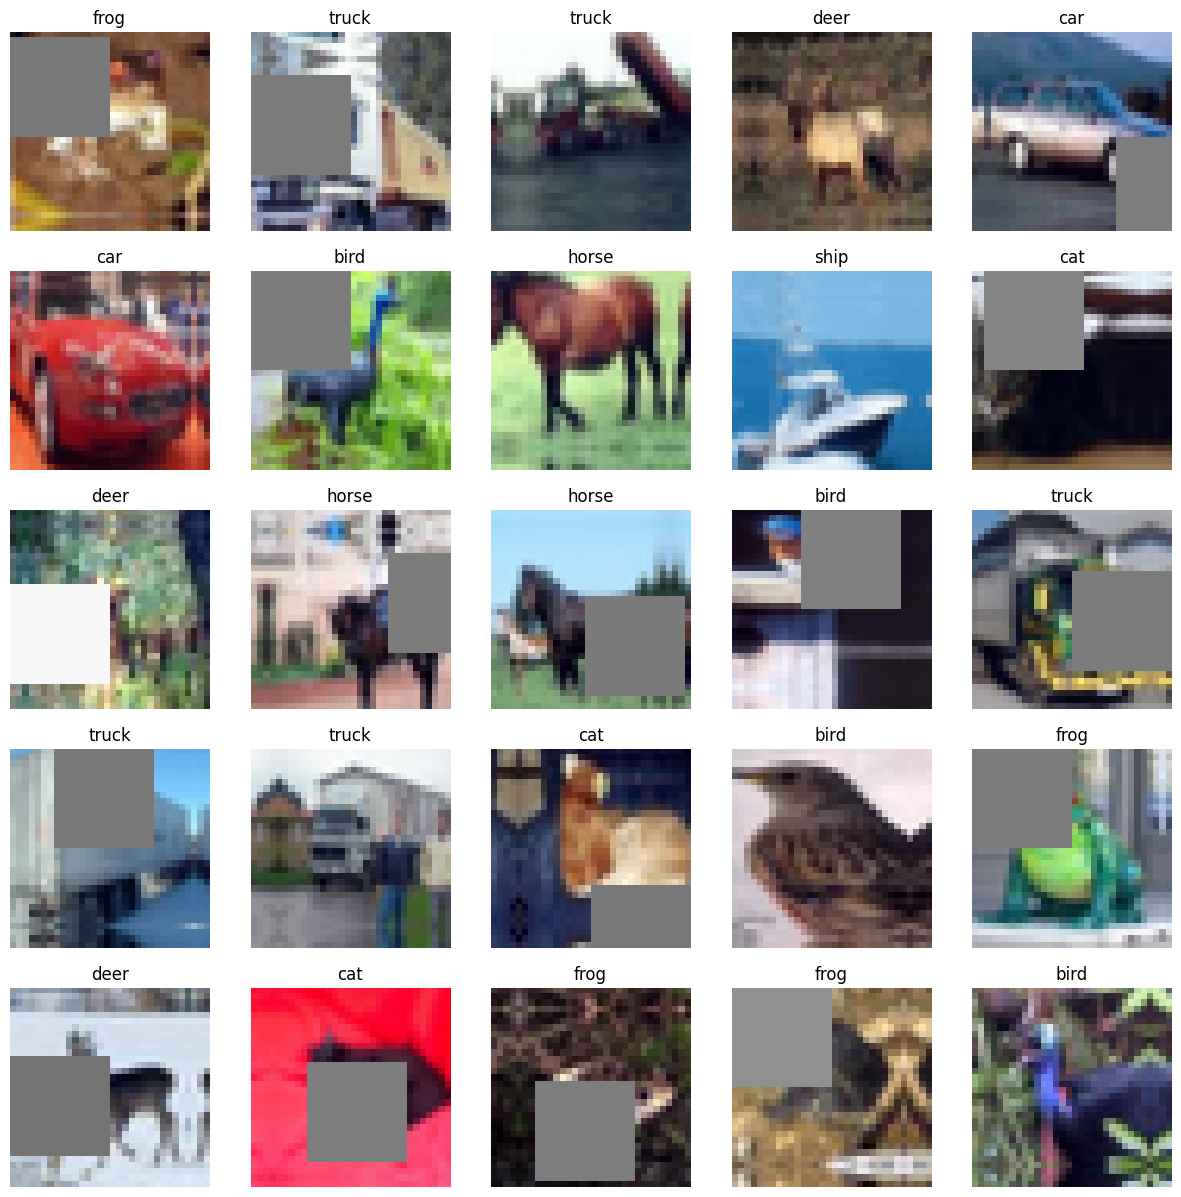

In [ ]:
obj.show_augmented_img(25)

In [ ]:
net = obj.model('resnet18', 32, show_summery=True)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [ ]:
criterion_ = nn.CrossEntropyLoss()
optimizer_ = optim.Adam(net.parameters(), lr=1e-7, weight_decay=1e-2)

  0%|          | 0/400 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.17E-04


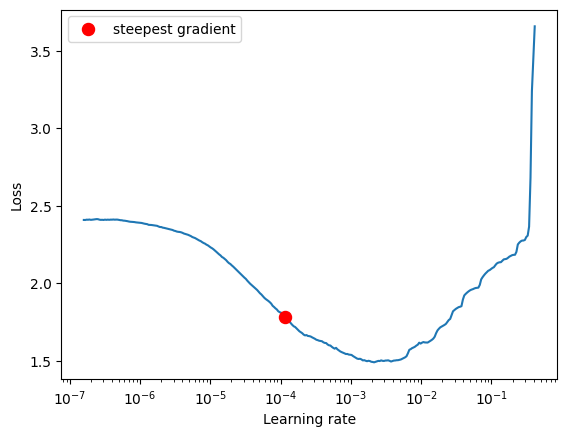

In [ ]:
obj.lr_finder(optimizer, criterion)

In [ ]:
len(obj.train_dataloader)

98

In [ ]:
# optimizer_ = optim.Adam(net.parameters(), lr=1e-7, weight_decay=1e-2)
epochs_ = 20
scheduler_ = OneCycleLR(optimizer_, max_lr=1.17E-04, steps_per_epoch=98, pct_start=5/epochs_, three_phase=False, div_factor=100, final_div_factor=100, epochs=epochs_)
# criterian_ = nn.CrossEntropyLoss()
reg = 0

Loss=1.9484214782714844 Batch_id=97 LR=0.00001 Accuracy=18.13: 100%|██████████| 98/98 [00:42<00:00,  2.28it/s]



Test set: Average loss: 0.0038, Accuracy: 2964/10000 (29.64%)



Loss=1.3616197109222412 Batch_id=97 LR=0.00004 Accuracy=37.81: 100%|██████████| 98/98 [00:43<00:00,  2.24it/s]



Test set: Average loss: 0.0028, Accuracy: 4690/10000 (46.90%)



Loss=1.301448941230774 Batch_id=97 LR=0.00008 Accuracy=48.95: 100%|██████████| 98/98 [00:43<00:00,  2.27it/s]



Test set: Average loss: 0.0025, Accuracy: 5465/10000 (54.65%)



Loss=1.1419756412506104 Batch_id=97 LR=0.00011 Accuracy=56.63: 100%|██████████| 98/98 [00:43<00:00,  2.25it/s]



Test set: Average loss: 0.0022, Accuracy: 6084/10000 (60.84%)



Loss=1.0102784633636475 Batch_id=97 LR=0.00012 Accuracy=62.15: 100%|██████████| 98/98 [00:43<00:00,  2.26it/s]



Test set: Average loss: 0.0028, Accuracy: 5489/10000 (54.89%)



Loss=0.8947958946228027 Batch_id=97 LR=0.00012 Accuracy=66.96: 100%|██████████| 98/98 [00:43<00:00,  2.26it/s]



Test set: Average loss: 0.0018, Accuracy: 6756/10000 (67.56%)



Loss=0.6972464919090271 Batch_id=97 LR=0.00011 Accuracy=70.79: 100%|██████████| 98/98 [00:43<00:00,  2.25it/s]



Test set: Average loss: 0.0017, Accuracy: 7124/10000 (71.24%)



Loss=0.7101192474365234 Batch_id=97 LR=0.00011 Accuracy=73.63: 100%|██████████| 98/98 [00:43<00:00,  2.24it/s]



Test set: Average loss: 0.0014, Accuracy: 7596/10000 (75.96%)



Loss=0.6292430758476257 Batch_id=97 LR=0.00010 Accuracy=75.77: 100%|██████████| 98/98 [00:43<00:00,  2.26it/s]



Test set: Average loss: 0.0016, Accuracy: 7355/10000 (73.55%)



Loss=0.6619576215744019 Batch_id=97 LR=0.00009 Accuracy=77.37: 100%|██████████| 98/98 [00:43<00:00,  2.26it/s]



Test set: Average loss: 0.0012, Accuracy: 7867/10000 (78.67%)



Loss=0.6025523543357849 Batch_id=97 LR=0.00008 Accuracy=79.19: 100%|██████████| 98/98 [00:43<00:00,  2.26it/s]



Test set: Average loss: 0.0015, Accuracy: 7323/10000 (73.23%)



Loss=0.6745455861091614 Batch_id=97 LR=0.00006 Accuracy=80.67: 100%|██████████| 98/98 [00:43<00:00,  2.26it/s]



Test set: Average loss: 0.0012, Accuracy: 8007/10000 (80.07%)



Loss=0.46813705563545227 Batch_id=97 LR=0.00005 Accuracy=82.18: 100%|██████████| 98/98 [00:43<00:00,  2.24it/s]



Test set: Average loss: 0.0012, Accuracy: 7979/10000 (79.79%)



Loss=0.4223979711532593 Batch_id=97 LR=0.00004 Accuracy=83.49: 100%|██████████| 98/98 [00:43<00:00,  2.25it/s]



Test set: Average loss: 0.0011, Accuracy: 8136/10000 (81.36%)



Loss=0.4145204424858093 Batch_id=97 LR=0.00003 Accuracy=85.04: 100%|██████████| 98/98 [00:43<00:00,  2.25it/s]



Test set: Average loss: 0.0009, Accuracy: 8448/10000 (84.48%)



Loss=0.4003881812095642 Batch_id=97 LR=0.00002 Accuracy=86.66: 100%|██████████| 98/98 [00:43<00:00,  2.26it/s]



Test set: Average loss: 0.0009, Accuracy: 8470/10000 (84.70%)



Loss=0.3906736969947815 Batch_id=97 LR=0.00001 Accuracy=87.79: 100%|██████████| 98/98 [00:43<00:00,  2.24it/s]



Test set: Average loss: 0.0008, Accuracy: 8598/10000 (85.98%)



Loss=0.2850036919116974 Batch_id=97 LR=0.00001 Accuracy=89.01: 100%|██████████| 98/98 [00:43<00:00,  2.25it/s]



Test set: Average loss: 0.0008, Accuracy: 8661/10000 (86.61%)



Loss=0.3731464743614197 Batch_id=97 LR=0.00000 Accuracy=89.58: 100%|██████████| 98/98 [00:43<00:00,  2.25it/s]



Test set: Average loss: 0.0008, Accuracy: 8683/10000 (86.83%)



Loss=0.28166860342025757 Batch_id=97 LR=0.00000 Accuracy=89.97: 100%|██████████| 98/98 [00:43<00:00,  2.25it/s]



Test set: Average loss: 0.0008, Accuracy: 8701/10000 (87.01%)



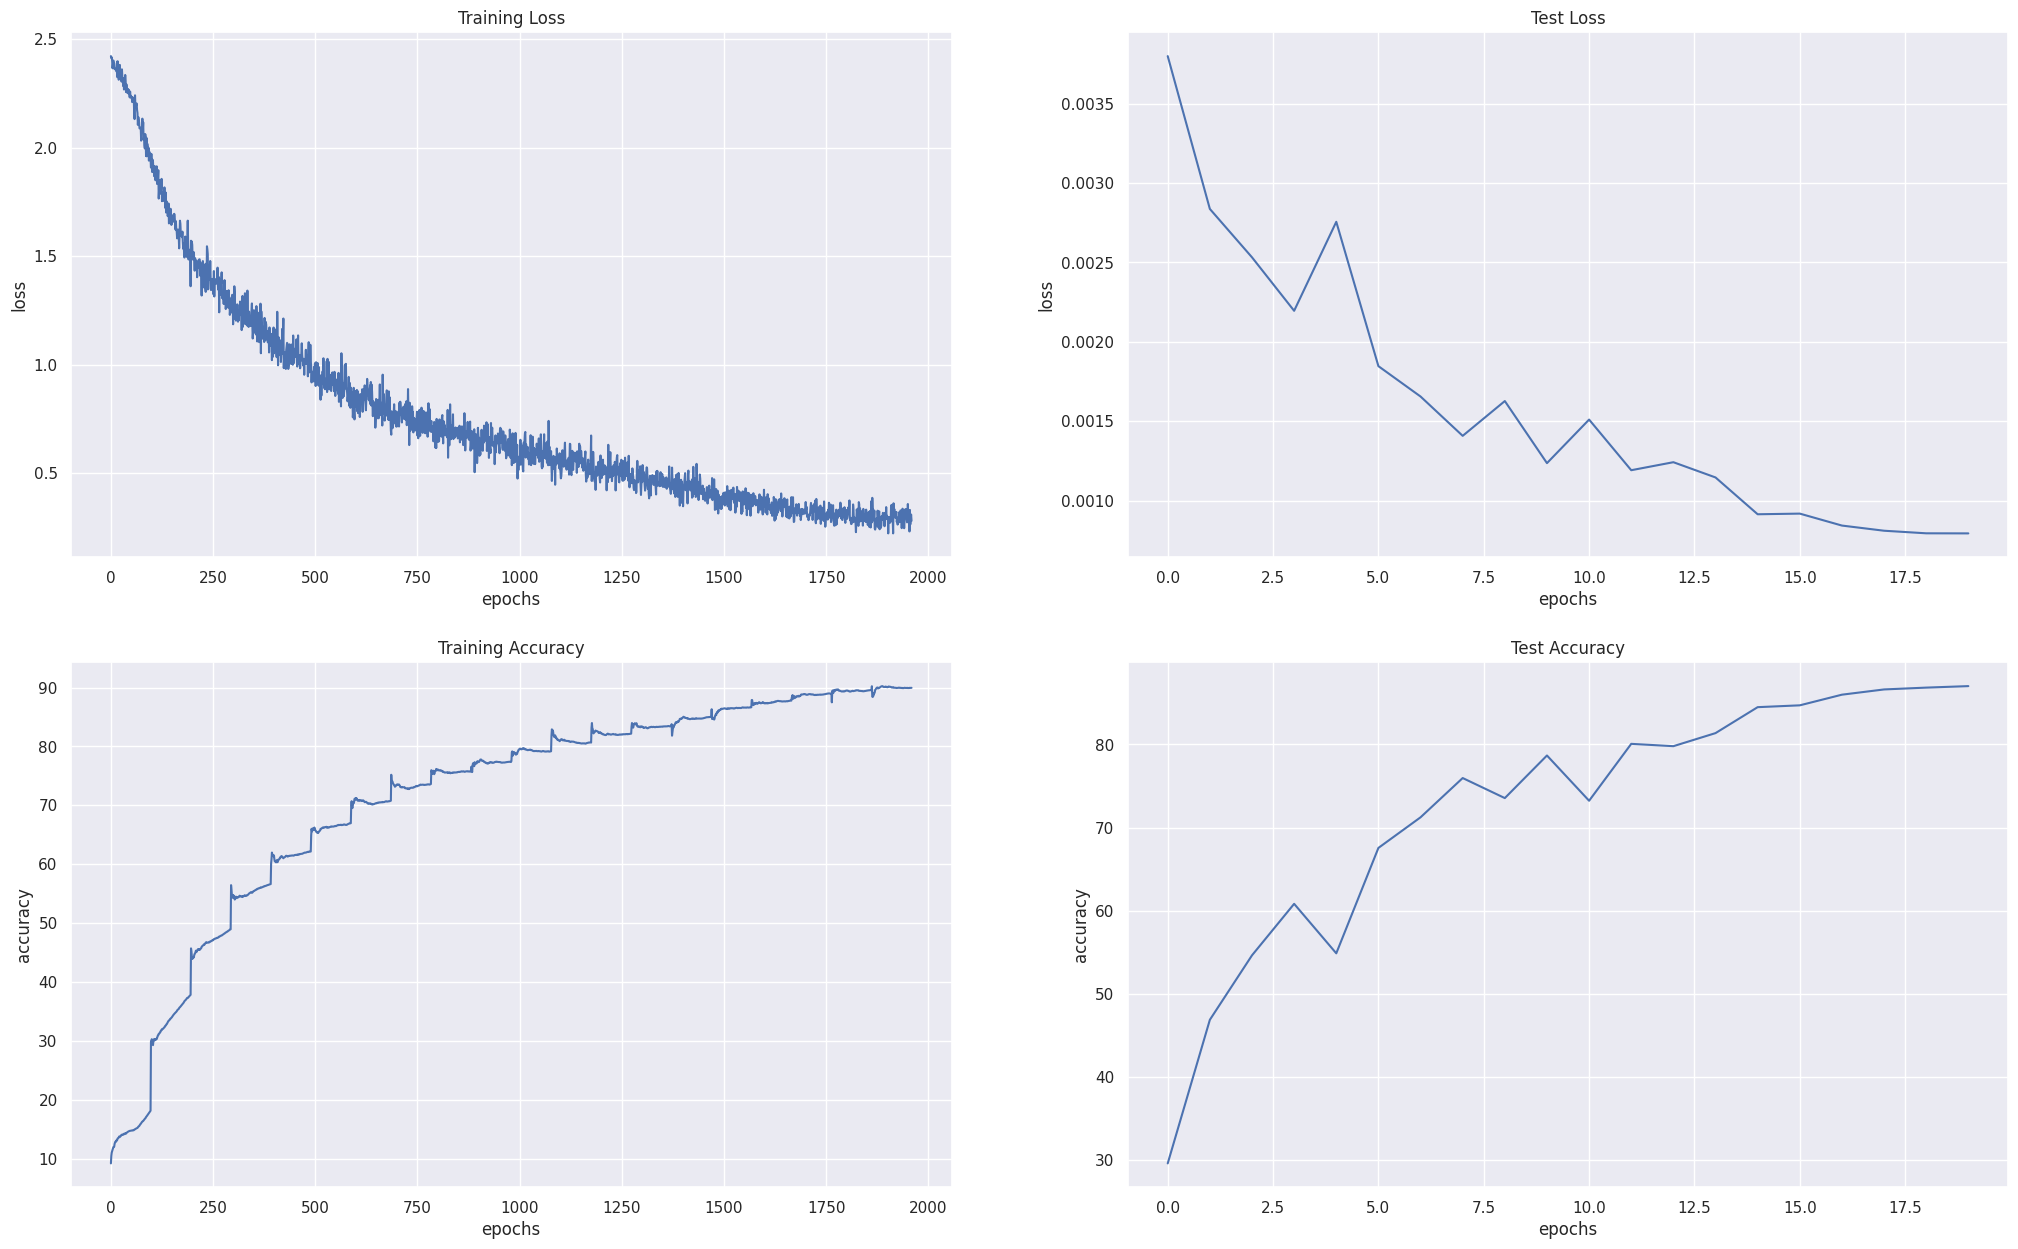

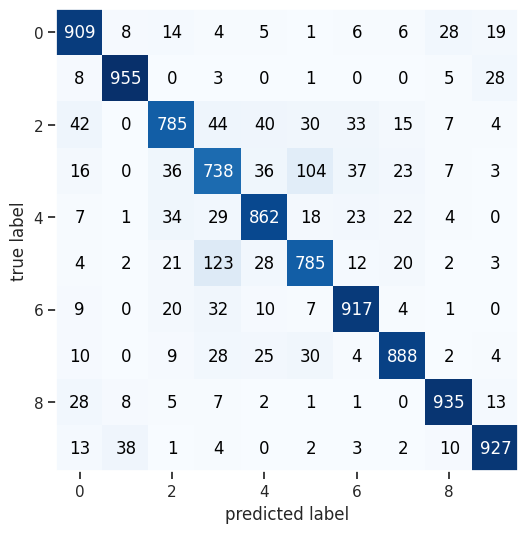

In [ ]:
obj.train_model(optimizer=optimizer_, epochs=epochs_ , criterian=criterion_, schedular=scheduler_, lam_reg=reg)

Total wrong predictions are 1299


/content/drive/MyDrive/ERA/torchcraft/utils/helper.py:202: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mean,std = torch.tensor(mean),torch.tensor(std)


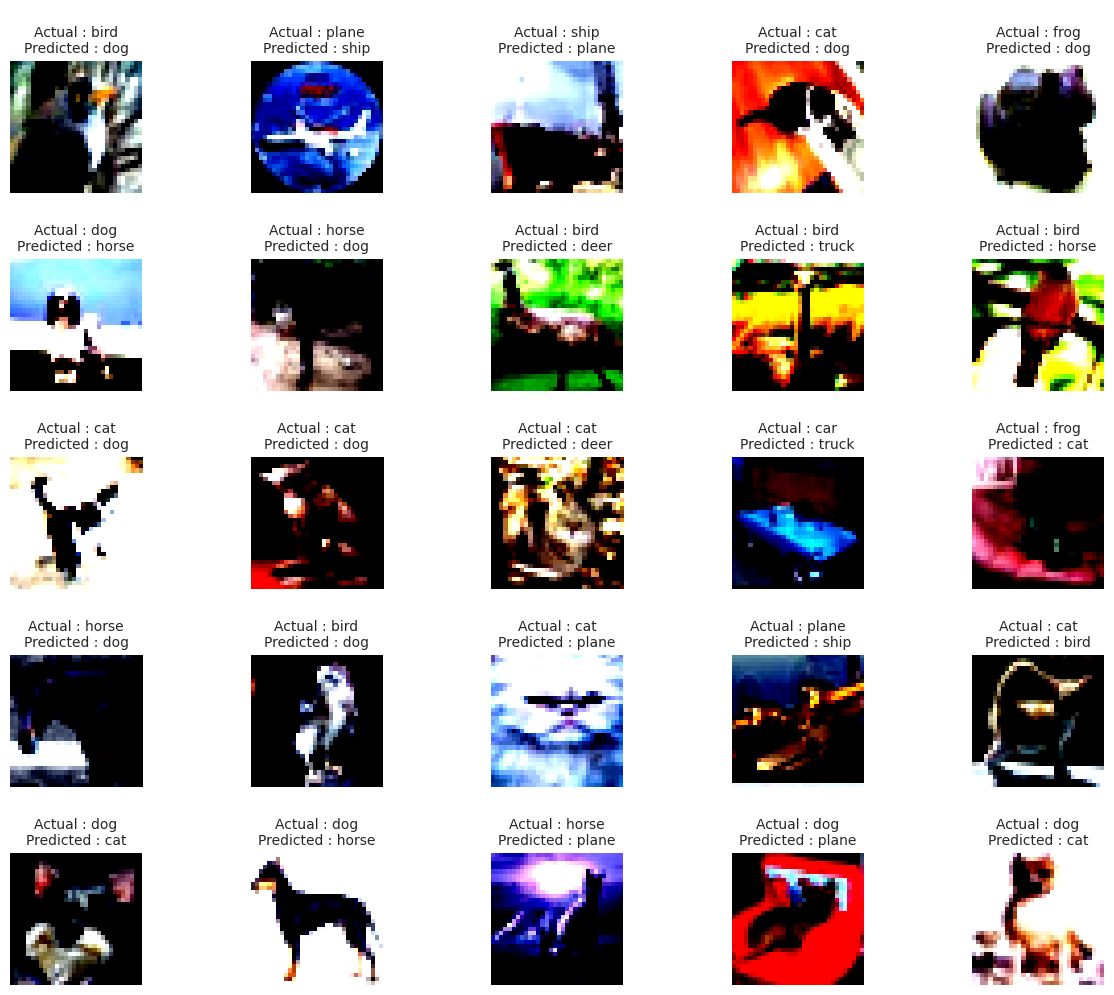

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1344: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


torch.Size([10, 10])
Generating Grad-CAM @layer1
Generating Grad-CAM @layer2
Generating Grad-CAM @layer3
Generating Grad-CAM @layer4


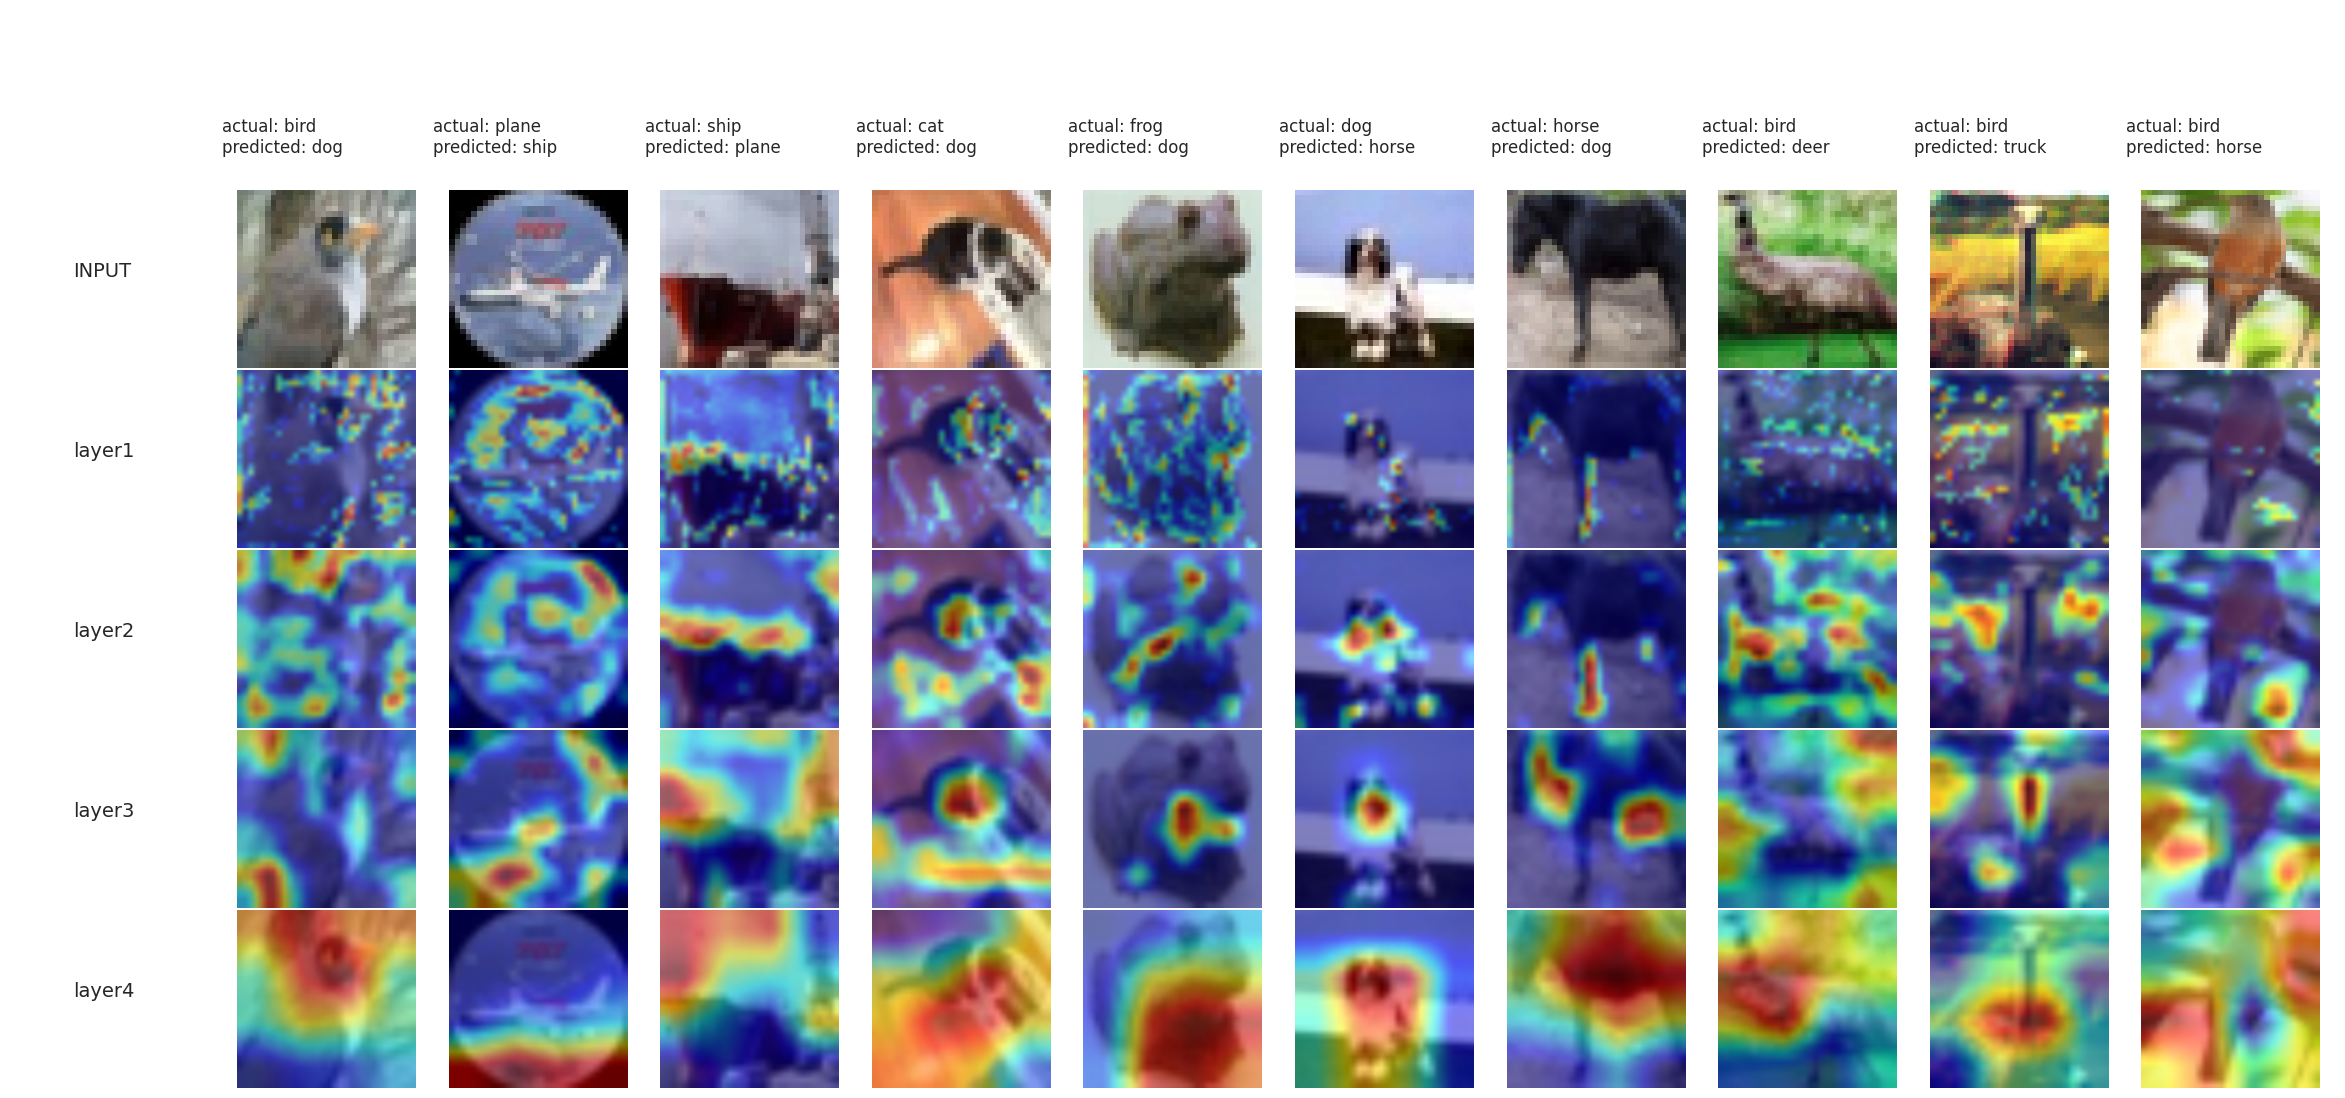

In [ ]:
obj.examination(25)